In [154]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn import preprocessing
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile, chi2
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import cross_val_score
np.random.seed(42)



## Dataset description

* **Gender**: Gender of the passengers (Female, Male)

* **Customer Type**: The customer type (Loyal customer, disloyal customer)

* **Age**: The actual age of the passengers

* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance**: The flight distance of this journey

* **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

* **Inflight service**: Satisfaction level of inflight service

* **Cleanliness**: Satisfaction level of Cleanliness

* **Departure Delay in Minutes**: Minutes delayed when departure

* **Arrival Delay in Minutes**: Minutes delayed when Arrival

* **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

*Source: kaggle.com*

In [9]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(103904, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(25976, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [67]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

##### In the dataset, there are three types of data: object, int64, and float64.
##### For the float64 data type, there are 310 missing values.
##### The target feature is 'satisfaction'.
##### The feature 'id' is not necessary for the model and is the first candidate for removal.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

#### For the feature 'Arrival Delay in Minutes', there are missing values. The median, mean, and mode have a significant range. I will compare 'Arrival Delay in Minutes' with 'Departure Delay in Minutes' since they are potentially correlated features. 
#### The feature 'id' is not necessary for the model and is the first candidate for removal.

In [12]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

#### There are 310 missing values in **Arrival Delay in Minutes** feature. Lets confirm if "Arrival Delay in Minutes" is correlated with "Departure Delay in Minutes"   

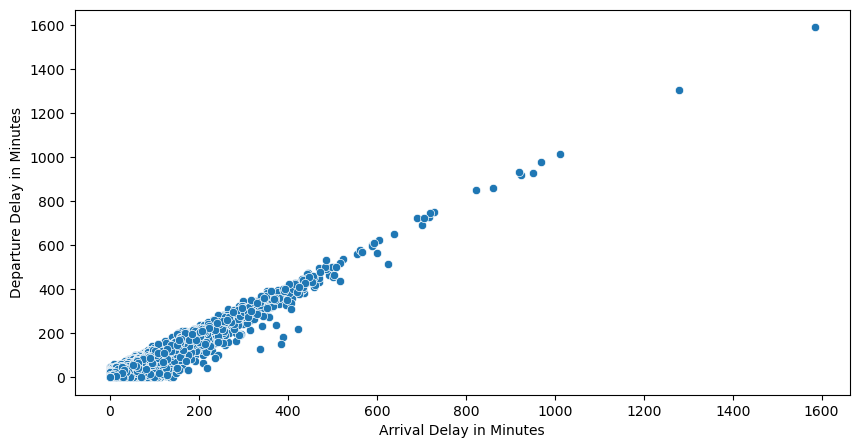

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=train, x="Arrival Delay in Minutes", y="Departure Delay in Minutes");

In [17]:
from scipy.stats import pearsonr
df_corr = train[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].dropna()
corr, _ = pearsonr(df_corr['Arrival Delay in Minutes'], df_corr['Departure Delay in Minutes'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.965


#### it is obvious that Arrival Delay in Minutes is highly correlated Departure Delay in Minutes, we can drop this feature

### Data Visualization

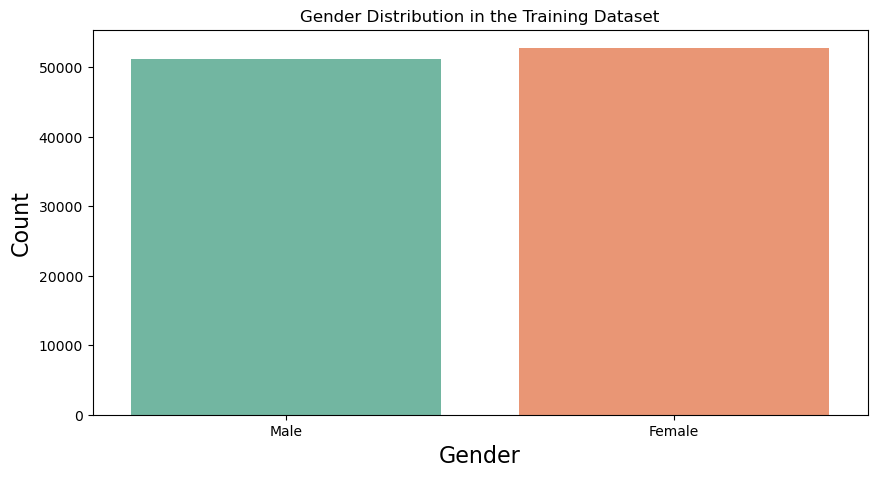

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=train, palette='Set2', order=['Male', 'Female'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Gender Distribution in the Training Dataset", fontsize=12)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()


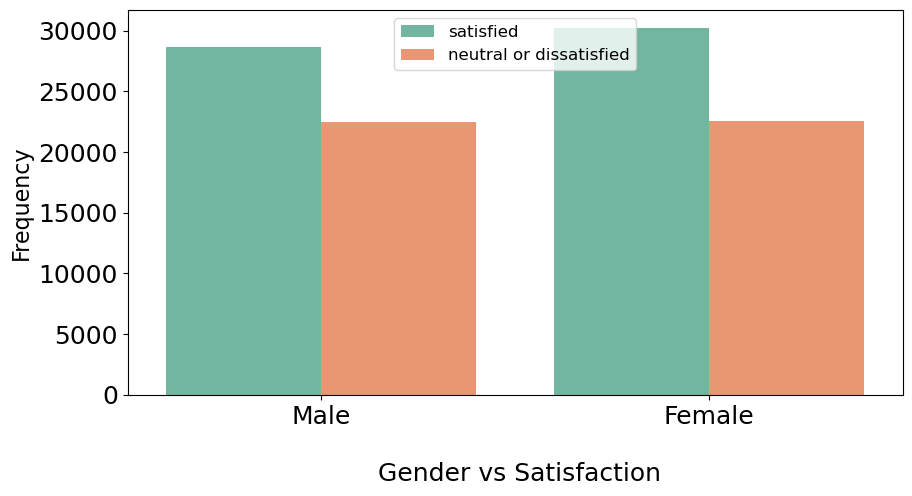

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='satisfaction', data=df, palette="Set2")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Gender vs Satisfaction', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['satisfied', 'neutral or dissatisfied'], loc='upper center', fontsize=12)
plt.show()

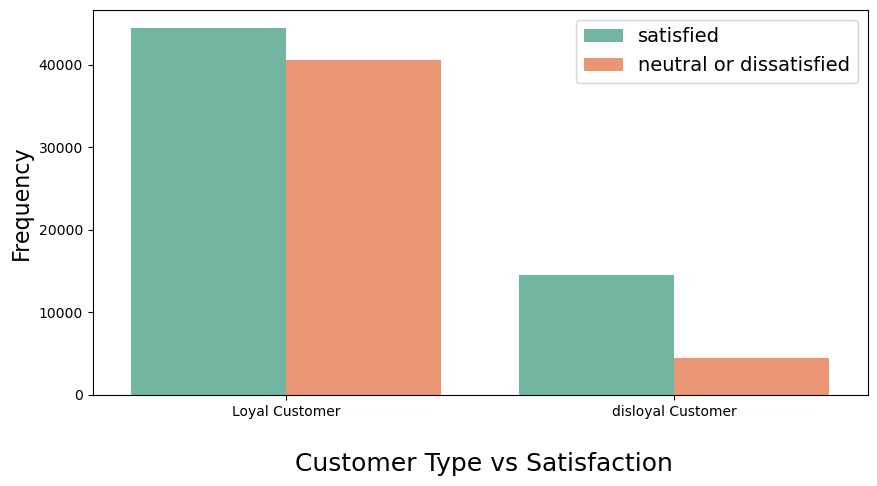

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='Customer Type', hue='satisfaction', data=train, palette="Set2")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Customer Type vs Satisfaction', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['satisfied', 'neutral or dissatisfied'], loc='upper right', fontsize=14)
plt.show()

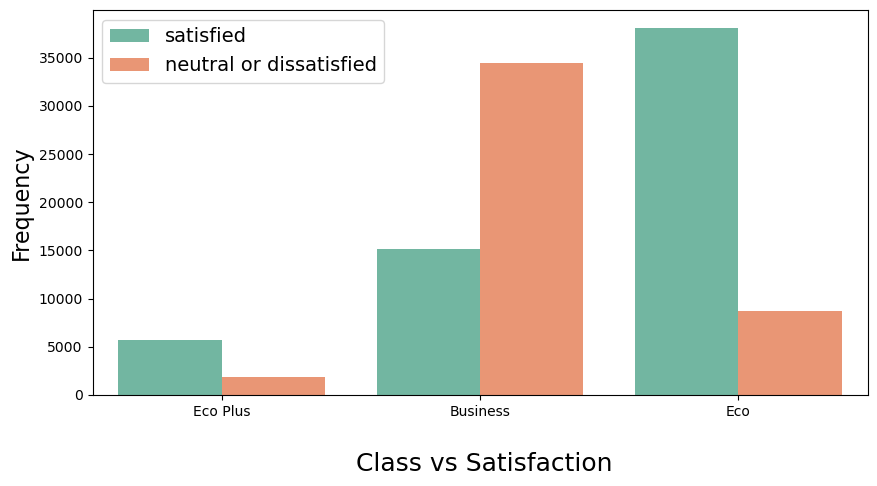

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class', hue='satisfaction', data=train, palette="Set2")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Class vs Satisfaction', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['satisfied', 'neutral or dissatisfied'], loc='upper left', fontsize=14)
plt.show()

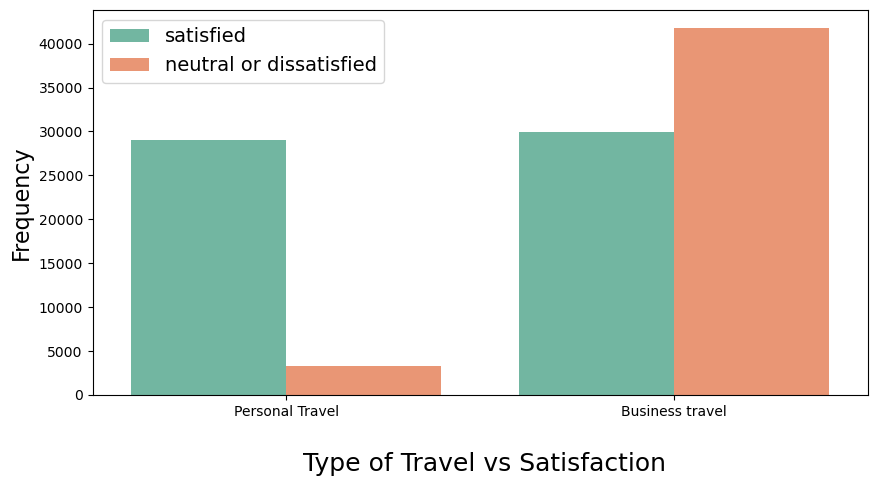

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='Type of Travel', hue='satisfaction', data=train, palette="Set2")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Type of Travel vs Satisfaction', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['satisfied', 'neutral or dissatisfied'], loc='upper left', fontsize=14)
plt.show()

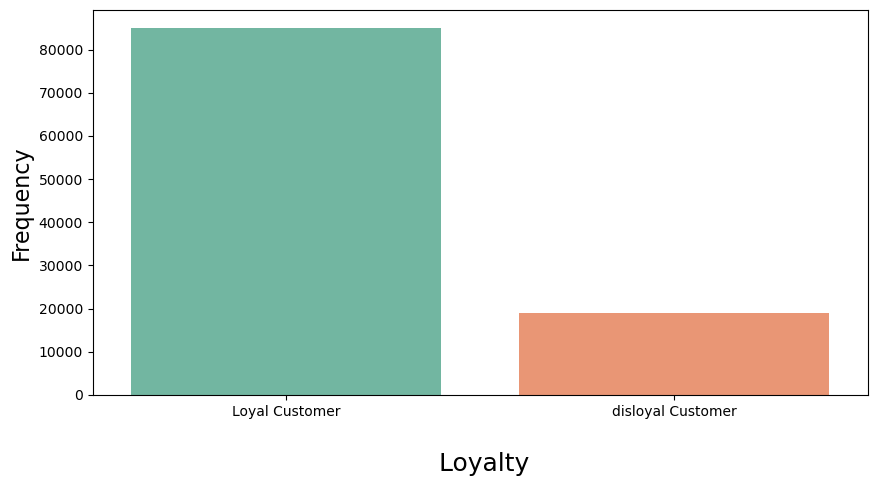

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='Customer Type', data=df, palette="Set2", order =['Loyal Customer', 'disloyal Customer'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Loyalty', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

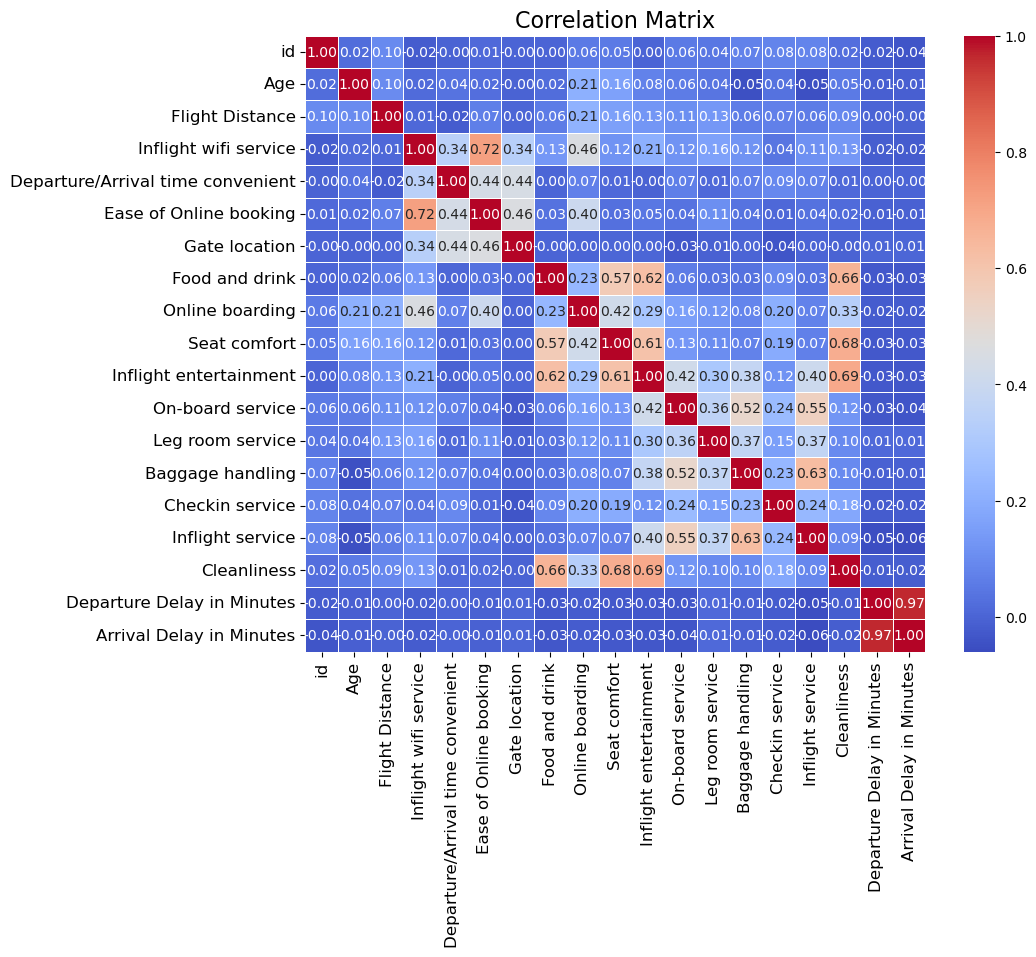

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### I will drop the Arrival Delay in Minutes because of its high correlation with depature delay in minutes

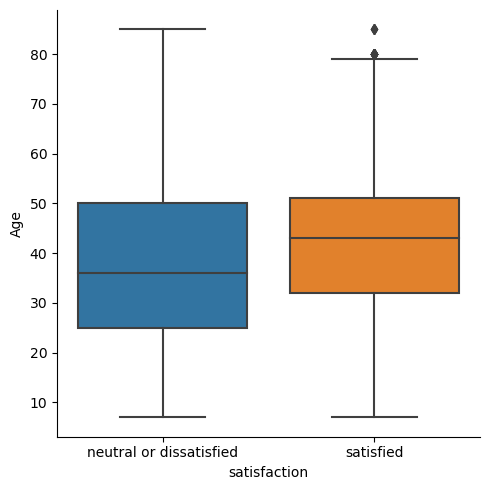

In [68]:
sns.catplot(x="satisfaction", y="Age", data=train, kind="box");

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [72]:
train


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### It can be observed that we have a significant number of features rated on a scale of 1-5, 14 to be precise

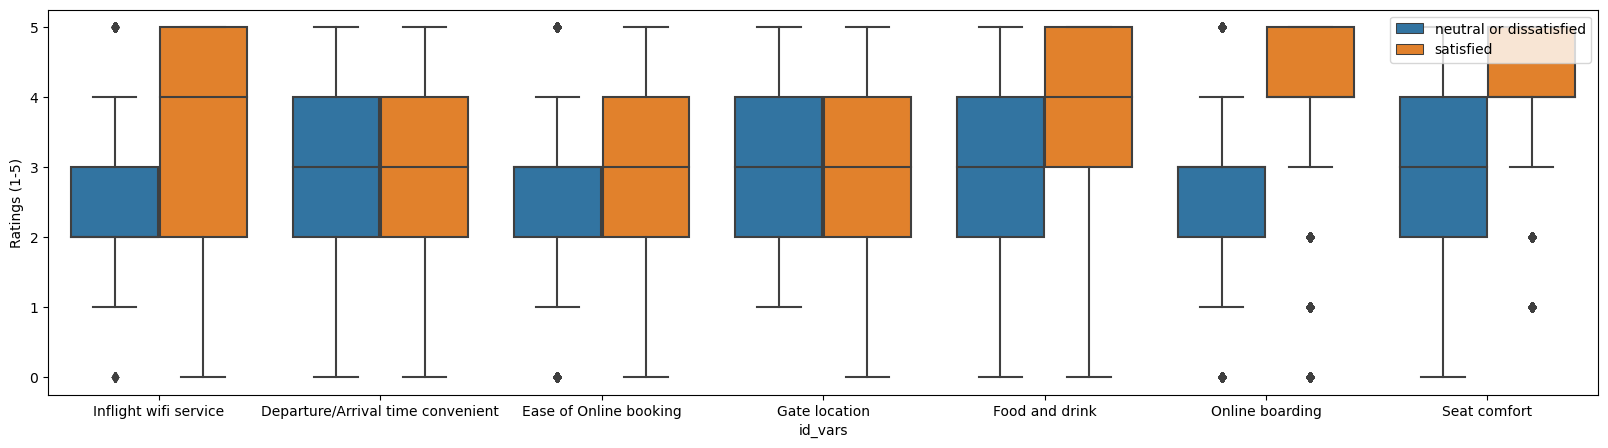

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=train.melt(id_vars=['satisfaction'], value_vars=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort'],
                 var_name='id_vars', value_name='Ratings (1-5)'),
    x='id_vars',
    y='Ratings (1-5)',
    hue='satisfaction',
)
plt.legend(loc='upper right')
plt.show()

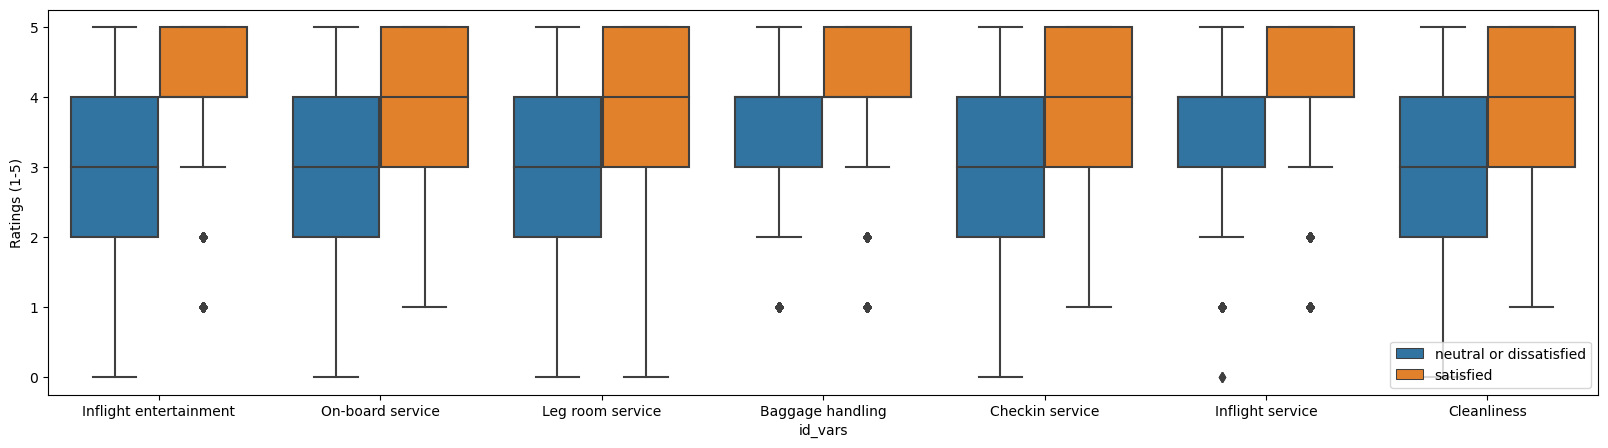

In [91]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=train.melt(id_vars=['satisfaction'], value_vars=['Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'],
                 var_name='id_vars', value_name='Ratings (1-5)'),
    x='id_vars',
    y='Ratings (1-5)',
    hue='satisfaction',
)
plt.legend(loc='lower right')
plt.show()

#### Some features show distinct distributions for each class, making them useful for modeling.
#### Others with similar distributions across classes may not be as informative. 
#### To enhance predictive power, we'll generate two new features by aggregating existing ones.

In [94]:
train['Average_satisfaction'] = (train['Inflight wifi service'] + df['Departure/Arrival time convenient'] + df['Ease of Online booking'] + df['Gate location'] + df['Food and drink'] + df['Online boarding'] +df['Seat comfort'] + df['On-board service'] + df['Leg room service'] + df['Baggage handling'] + df['Checkin service'] + df['Inflight service'] + df['Cleanliness']) / 14


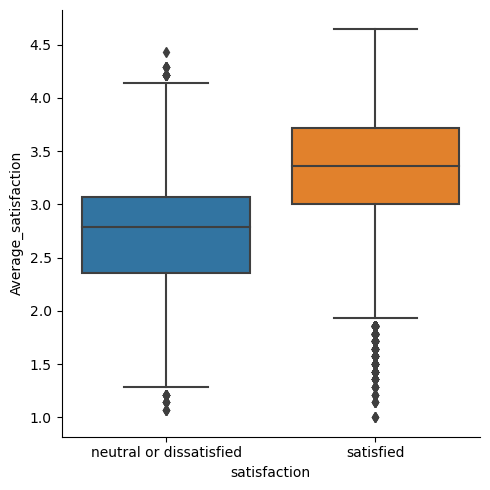

In [95]:
sns.catplot(x="satisfaction", y="Average_satisfaction", data=train, kind="box");

In [98]:
train['Median_satisfaction'] = train[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].apply(lambda x: x.median(), axis=1)


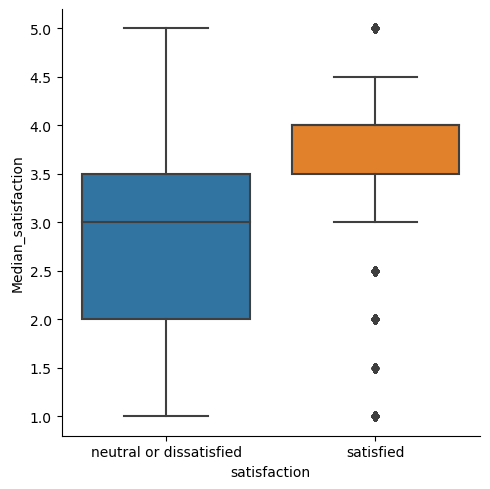

In [99]:
sns.catplot(x="satisfaction", y="Median_satisfaction", data=train, kind="box");

In [ ]:
## data prepartaion fopr test data

In [114]:
test = pd.read_csv('test.csv')
test.drop(columns=['Arrival Delay in Minutes', "id"], inplace=True)

test['Average_satisfaction'] = (test['Inflight wifi service'] + test['Departure/Arrival time convenient'] + 
                                test['Ease of Online booking'] + test['Gate location'] + test['Food and drink'] + 
                                test['Online boarding'] + test['Seat comfort'] + test['On-board service'] + 
                                test['Leg room service'] + test['Baggage handling'] + test['Checkin service'] + 
                                test['Inflight service'] + test['Cleanliness']) / 14

test['Median_satisfaction'] = test[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].filter(items=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']).apply(lambda x: x.median(), axis=1)

In [115]:
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Average_satisfaction,Median_satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,2,5,5,50,satisfied,3.785714,4.5
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,3,4,5,0,satisfied,3.142857,4.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,4,1,3,2,2,2,0,neutral or dissatisfied,2.000000,2.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,3,1,4,0,satisfied,1.714286,1.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,4,2,4,0,satisfied,2.500000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,2,4,4,5,4,0,neutral or dissatisfied,3.071429,3.5
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,5,5,5,5,4,0,satisfied,4.000000,4.0
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,4,3,4,5,4,2,0,neutral or dissatisfied,2.857143,2.5
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,3,2,5,4,5,4,0,satisfied,3.357143,4.0


In [141]:
train_obj = train.select_dtypes(include=['object'])
clmns = [i for i in train_obj.columns]

le = LabelEncoder()

for clmn in clmns:
  le.fit(train[clmn])
  train[clmn] = le.transform(train[clmn])
for clmn in clmns:
  le.fit(test[clmn])
  test[clmn] = le.transform(test[clmn])


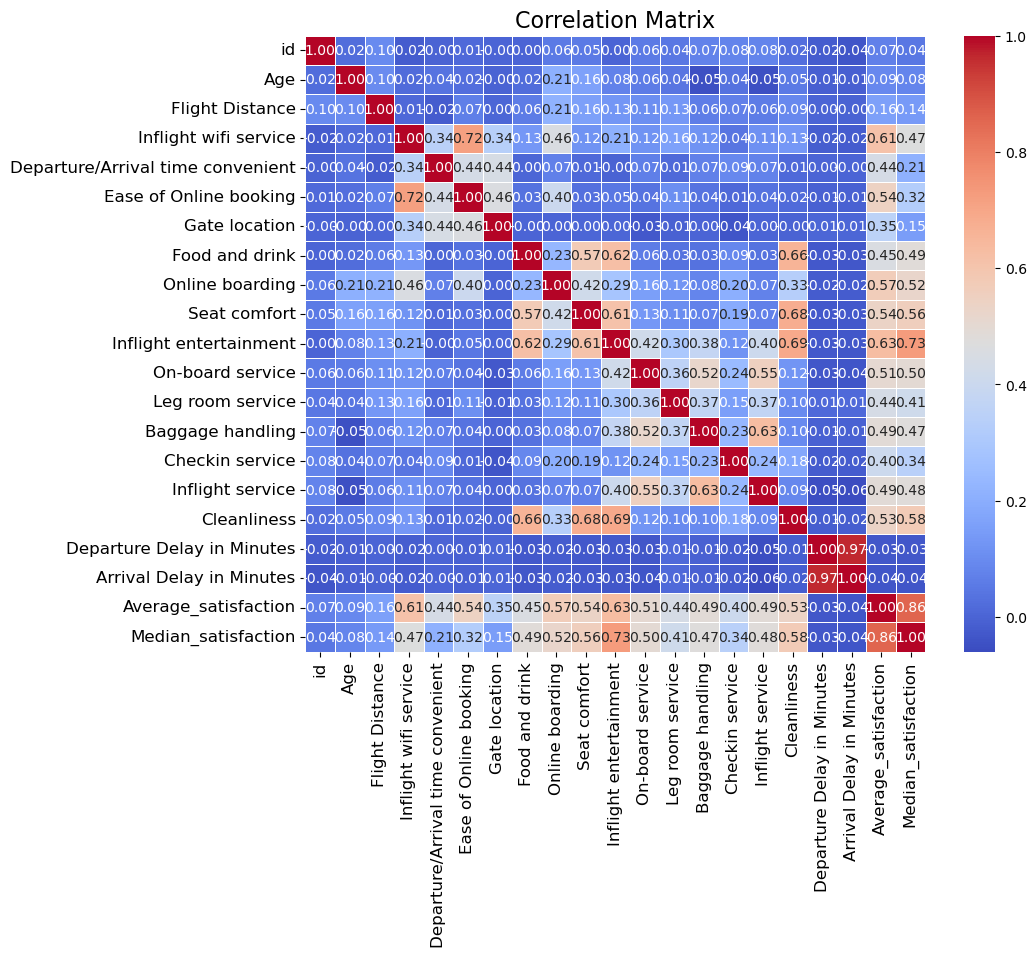

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [109]:
train.drop(columns=['Arrival Delay in Minutes',"id"], inplace=True)

##### dropping the id collumn and arrival delay in minutes

In [110]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Average_satisfaction,Median_satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,neutral or dissatisfied,3.500000,4.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,neutral or dissatisfied,2.214286,2.5
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,satisfied,3.357143,4.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,neutral or dissatisfied,2.857143,2.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,satisfied,3.285714,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,3,1,4,2,3,2,3,neutral or dissatisfied,2.071429,2.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,4,0,satisfied,4.000000,4.5
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,3,2,4,5,5,4,7,neutral or dissatisfied,2.785714,3.5
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,4,5,1,5,4,1,0,neutral or dissatisfied,2.214286,1.0


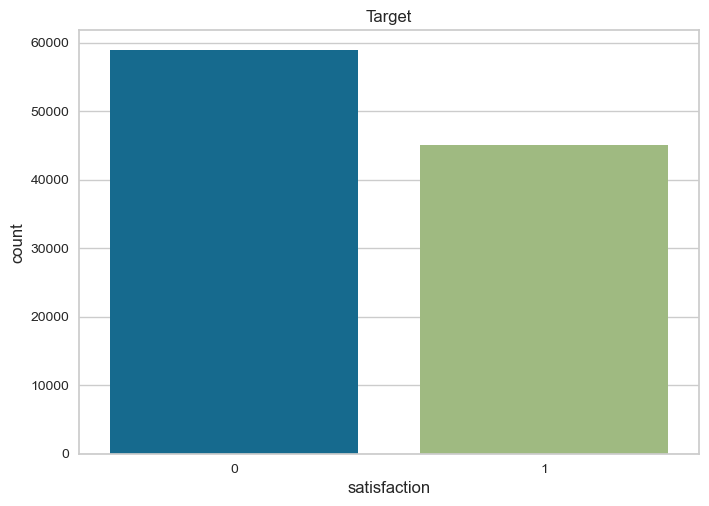

In [131]:
train.dropna(inplace=True)
test.dropna(inplace=True)

##### As we can see it is almost balanced, Now we can drop our target variable and start creating different models in order to find the best one!


In [143]:
X_train = train.drop(columns=['satisfaction'])
y_train = train['satisfaction']
X_test = test.drop(columns=['satisfaction'])
y_test = test['satisfaction']

### Trying diiffrent models 

#### Logistic model

TEST RESULTS
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

__________________________________________________
TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     58879
           1       0.87      0.83      0.85     45025

    accuracy                           0.88    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.87      0.88      0.87    103904



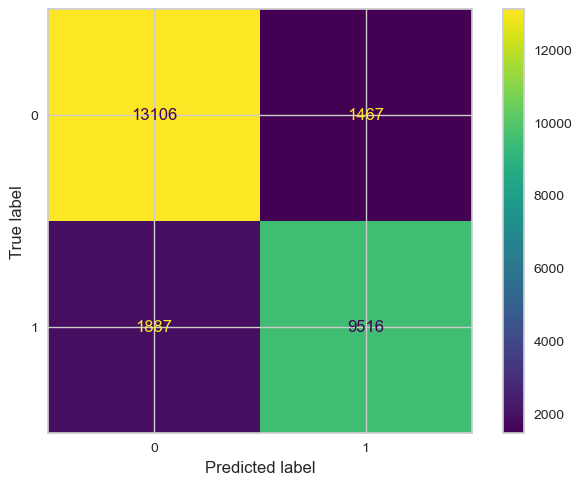

In [148]:
model_logreg = LogisticRegression(max_iter=2000)
model_logreg.fit(X_train, y_train)

y_pred_test_lr = model_logreg.predict(X_test)
y_pred_train_lr = model_logreg.predict(X_train)

print('TEST RESULTS')
print(classification_report(y_test, y_pred_test_lr))
print(f'{"_" * 50}\nTRAIN RESULTS')
print(classification_report(y_train, y_pred_train_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_lr);

### Gradient Boosting

TEST RESULTS
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

__________________________________________________
TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     58879
           1       0.98      0.96      0.97     45025

    accuracy                           0.97    103904
   macro avg       0.98      0.97      0.97    103904
weighted avg       0.98      0.97      0.97    103904



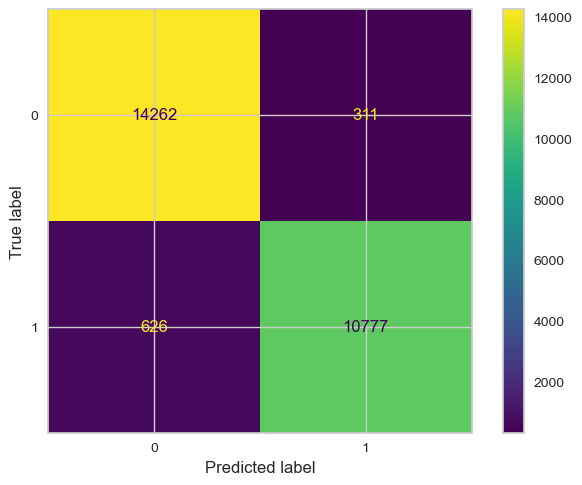

In [167]:
cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)

y_pred_test_cb = cb_model.predict(X_test)
y_pred_train_cb = cb_model.predict(X_train)

print('TEST RESULTS')
print(classification_report(y_test, y_pred_test_cb))
print(f'{"_" * 50}\nTRAIN RESULTS')
print(classification_report(y_train, y_pred_train_cb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cb);

In [169]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree

TEST RESULTS
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14573
           1       0.96      0.92      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

__________________________________________________
TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     58879
           1       0.97      0.92      0.95     45025

    accuracy                           0.95    103904
   macro avg       0.96      0.95      0.95    103904
weighted avg       0.96      0.95      0.95    103904



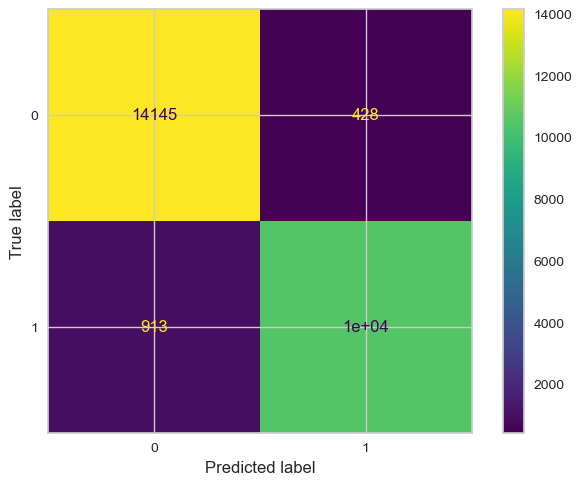

In [170]:
model_dt = DecisionTreeClassifier(max_depth=11)
model_dt.fit(X_train, y_train)

y_pred_test_dt = model_dt.predict(X_test)
y_pred_train_dt = model_dt.predict(X_train)

print('TEST RESULTS')
print(classification_report(y_test, y_pred_test_dt))
print(f'{"_" * 50}\nTRAIN RESULTS')
print(classification_report(y_train, y_pred_train_dt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_dt);

### Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=5)
forest.fit(X_train, y_train)
print("Accuracy at train set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy at test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy at train set: 0.916
Accuracy at test set: 0.917


### MLP Classifier

In [177]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0,
                    hidden_layer_sizes=[100, 100])
mlp.fit(X_train, y_train)

print("Accuracy at train set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy at test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy at train set: 0.92
Accuracy at test set: 0.92


## Conclusion

### CatBoost model shows us the best result. Let's explore it's feature importance

##### bar plot to show feature importance

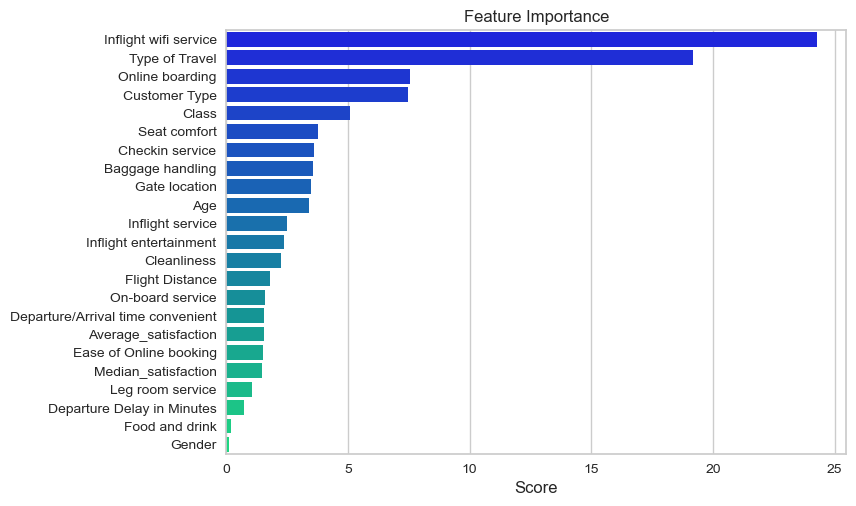

In [178]:
imp_feat = pd.DataFrame({'feature':X_train.columns,'importance':cb_model.feature_importances_}).sort_values(by='importance',ascending=False)
sns.barplot(data=imp_feat, y='feature', x='importance', orient='h', palette='winter').set(title='Feature Importance', ylabel='', xlabel='Score')
plt.show()

##### The least important features are Gender and Food and drink, so I will get rid of them

#### hyperparameter tuning for a CatBoost classifier using randomized search cross validation.

In [183]:
grid_cb = RandomizedSearchCV(
            CatBoostClassifier(verbose=0),       
            param_distributions = {               
                'max_depth': range(2, 5),
                'learning_rate': np.linspace(0.001, 0.3, 80),
            },
            scoring = 'f1',
            cv = 3,                                 
            n_jobs = -1,                            
            return_train_score = True,              
            n_iter=10,                              
            verbose = 5,                            
        )

grid_cb.fit(X_train, y_train)

print(f"Best score:  {grid_cb.best_score_}")
print(f"Best params: {grid_cb.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best score:  0.9557065452566063
Best params: {'max_depth': 4, 'learning_rate': 0.14103797468354431}


In [185]:
! pip install shap

In [188]:
import shap

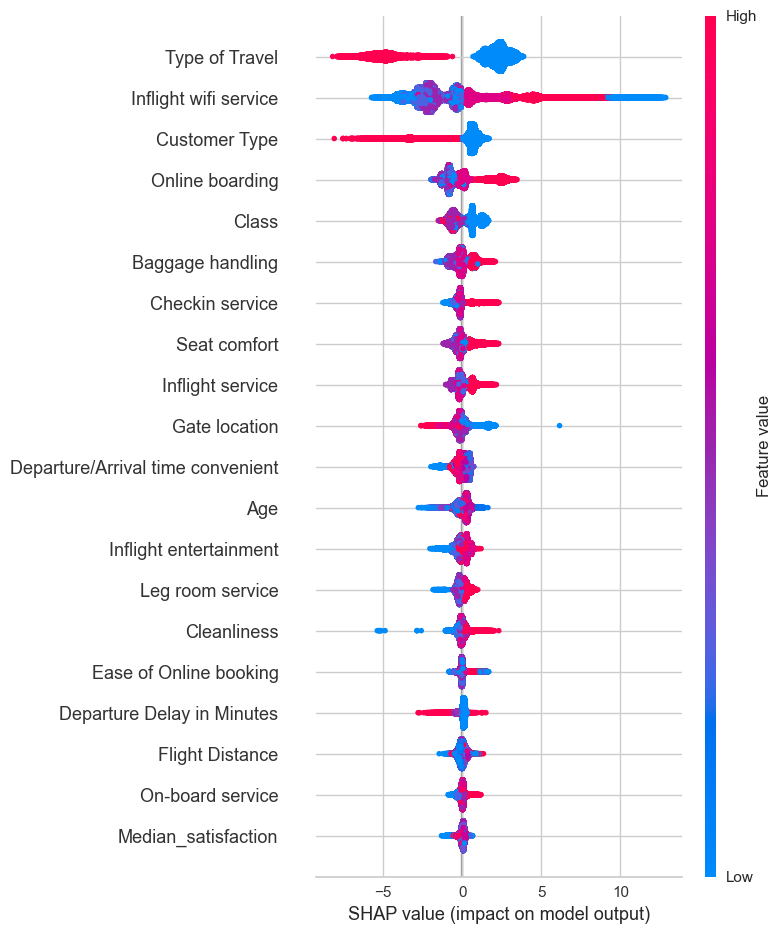

In [189]:
explainer = shap.TreeExplainer(grid_cb.best_estimator_)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [190]:
X_train.drop(columns=['Gender','Food and drink'], inplace=True)
X_test.drop(columns=['Gender','Food and drink'], inplace=True)

TEST RESULTS
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

__________________________________________________
TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     58879
           1       0.98      0.96      0.97     45025

    accuracy                           0.97    103904
   macro avg       0.98      0.97      0.97    103904
weighted avg       0.98      0.97      0.97    103904



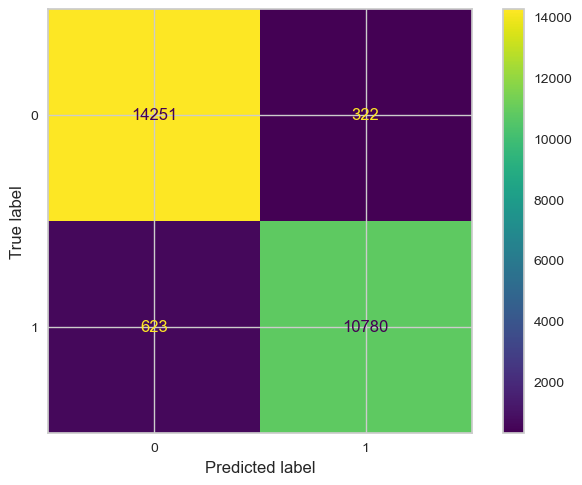

In [192]:
cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)

y_pred_test_cb = cb_model.predict(X_test)
y_pred_train_cb = cb_model.predict(X_train)

print('TEST RESULTS')
print(classification_report(y_test, y_pred_test_cb))
print(f'{"_" * 50}\nTRAIN RESULTS')
print(classification_report(y_train, y_pred_train_cb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cb);

####  Combining the obtained models using stacking 
##### Create a list of tuples for the base models in the form of (str, model)

In [197]:
estimators = [
    ('model_dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        max_depth=9,
        random_state=42
        )
    ),
    ('model_logreg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42,
        max_iter=1000
        )
    ),
    ('cb_model', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=9,
        random_state=42
        )
    )
]
# Create an instance of the StackingClassifier class
%time 
model_stack = ensemble.StackingClassifier(estimators=estimators,
                                          final_estimator=linear_model.LogisticRegression(solver='sag',
                                                                                          random_state=42,
                                                                                          max_iter=1000)
)
model_stack.fit(X_train, y_train)
#Make predictions on the test and training datasets
y_train_pred_stack = model_stack.predict(X_train)
y_test_pred_stack = model_stack.predict(X_test)
# Evaluate the precision metric on the test dataset
print('Classification Metrics Report:\n',(metrics.classification_report(y_test, y_test_pred_stack)))
# Evaluate the precision metric on the test dataset
print('Evaluate the precision metric on the test dataset:\n',(round(metrics.precision_score(y_test, y_test_pred_stack),3)))

CPU times: total: 0 ns
Wall time: 0 ns
Classification Metrics Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Evaluate the precision metric on the test dataset:
 0.968
